# From `datascience` to `pandas`

Throughout this semsester we have been working mostly with the `datascience` package that was created specifically for Berkeley Data8 course.
The package is very useful for the purposes of the course; but once you start 
programming in Python on your own, most likely you will want to use the `pandas` package, which the `datascience` package is built on top of.
`pandas` is a versatile package that is very popular among Pyhton users.

To help you transition from `datascience` to `pandas`, today we are going to talk about basics of `pandas` and how the commands we learned from the `datascience` package translate into `pandas`.

To start using `pandas` we need to `import` it. The common abbreviation for `pandas` is `pd` (similar to `numpy` and `np`).

In [2]:
from datascience import * 
import pandas as pd 
import numpy as np 

import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Dataframes: Working with Tabular Data <a id='dataframes'></a>

In Python's `datascience` module, we used `Table` to build our dataframes and used commands such as `select()`, `where()`, `group()`, `column()` etc. In this section, we will go over some basic commands to work with tabular data in Pandas.

### 1.1 Creating a Dataframe <a id='creating'> </a>

`pandas` introduces a data structure (i.e. dataframe) that represents data as a table with columns and rows. 

In Python's `datascience` module that is used in Data8, this is how we created tables from scratch by extending an empty table:

In [3]:
ds_tb = Table().with_columns([
     'letter', ['a', 'b', 'c', 'z'],
     'count',  [  9,   3,   3,   1],
     'points', [  1,   2,   2,  10],
 ])
ds_tb

letter,count,points
a,9,1
b,3,2
c,3,2
z,1,10


In `pandas`, we can use the function `pd.DataFrame` to initialize a dataframe from a dictionary or a list-like object. Refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) for more information.

**What is a dictionary?** A dictionary is a Python data structure that allows us to store data as pairs of the form key:value. Keys must be unique and values can be more or less anything: integer, character, array, list, even another dictionary.

In [4]:
dict = {'name':'Alice', 'age':27, 'occupation':'student'} # basic dictionary
print(dict)
dict['name']

{'name': 'Alice', 'age': 27, 'occupation': 'student'}


'Alice'

In [5]:
# Example: creating a dataframe from a dictionary
pd_df = pd.DataFrame({ 'letter' : ['a', 'b', 'c', 'z'],
                      'count' : [  9,   3,   3,   1],
                      'points' : [  1,   2,   2,  10]
                      })
pd_df

,letter,count,points
0,a,9,1
1,b,3,2
2,c,3,2
3,z,1,10


More often, we will need to create a dataframe by importing data from a .csv file. In `datascience`, this is how we read data from a csv:

In [6]:
ds_baby = Table.read_table('baby.csv')
ds_baby

Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
1,120,284,27,62,100,False
2,113,282,33,64,135,False
3,128,279,28,64,115,True
4,108,282,23,67,125,True
5,136,286,25,62,93,False
6,138,244,33,62,178,False
7,132,245,23,65,140,False
8,120,289,25,62,125,False
9,143,299,30,66,136,True
10,140,351,27,68,120,False


In Pandas, we use `pd.read_csv()` to read data from a csv file. Sometimes, depending on the data file, we may need to specify the parameters `sep`, `header` or `encoding` as well. For a full list of parameters, refer to [this guide](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [7]:
# Reading baby.csv (located in current working directory)
pd_baby = pd.read_csv('baby.csv')
pd_baby # displays several first and last rows

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False
5,6,138,244,33,62,178,False
6,7,132,245,23,65,140,False
7,8,120,289,25,62,125,False
8,9,143,299,30,66,136,True
9,10,140,351,27,68,120,False


In [8]:
pd_baby.head() # display the first few rows of dataframe
pd_baby.tail(10) # display the last 10 rows of dataframe

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
1164,1165,109,244,21,63,102,True
1165,1166,103,278,30,60,87,True
1166,1167,118,276,34,64,116,False
1167,1168,127,290,27,65,121,False
1168,1169,132,270,27,65,126,False
1169,1170,113,275,27,60,100,False
1170,1171,128,265,24,67,120,False
1171,1172,130,291,30,65,150,True
1172,1173,125,281,21,65,110,False
1173,1174,117,297,38,65,129,False


In [9]:
# View summary of data
pd_baby.describe()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,587.500000,119.462521,279.101363,27.228279,64.049404,128.478705
std,339.048915,18.328671,16.010305,5.817839,2.526102,20.734282
min,1.000000,55.000000,148.000000,15.000000,53.000000,87.000000
25%,294.250000,108.000000,272.000000,23.000000,62.000000,114.250000
50%,587.500000,120.000000,280.000000,26.000000,64.000000,125.000000
75%,880.750000,131.000000,288.000000,31.000000,66.000000,139.000000
max,1174.000000,176.000000,353.000000,45.000000,72.000000,250.000000


We can also read files from a URL, which is very handy. (This works for `Table.read_table` too.)

In [10]:
# Example: loading csv from URL
pd_galton = pd.read_csv('https://raw.githubusercontent.com/YData123/sds123-sp21/main/demos/lec30/galton.csv')
pd_galton.head()


,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5


In [11]:
# View information about dataframe
print(pd_galton.shape) # view dimensions (rows, cols)
print(pd_galton.columns.values) # view column names

(934, 8)
['family' 'father' 'mother' 'midparentHeight' 'children' 'childNum'
 'gender' 'childHeight']


### 1.2 Accessing Values in Dataframe <a id='accessing'> </a>

In `datascience`, we can use `column()` to access values in a particular column as follows:

In [12]:
# Access column 'letter', returns array
ds_tb.column('letter')

array(['a', 'b', 'c', 'z'], dtype='<U1')

In [13]:
# We can also access the column using square bracket notation:
ds_tb['letter']

array(['a', 'b', 'c', 'z'], dtype='<U1')

In `pandas` we access a column by using the square bracket notation.

In [14]:
pd_galton['gender']

0        male
1      female
2      female
3      female
4        male
5        male
6      female
7      female
8        male
9      female
10       male
11       male
12     female
13     female
14     female
15       male
16       male
17       male
18     female
19     female
20     female
21     female
22       male
23       male
24       male
25       male
26     female
27     female
28     female
29     female
        ...  
904    female
905      male
906      male
907      male
908      male
909    female
910      male
911      male
912    female
913    female
914    female
915    female
916    female
917      male
918      male
919    female
920    female
921    female
922    female
923    female
924      male
925      male
926    female
927    female
928    female
929      male
930    female
931    female
932      male
933    female
Name: gender, Length: 934, dtype: object

In [15]:
type(pd_galton['gender']) # pandas type Series

pandas.core.series.Series

If we want a numpy array of column values, it is available as the name `.values`:

In [16]:
pd_galton['gender'].values

array(['male', 'female', 'female', 'female', 'male', 'male', 'female',
       'female', 'male', 'female', 'male', 'male', 'female', 'female',
       'female', 'male', 'male', 'male', 'female', 'female', 'female',
       'female', 'male', 'male', 'male', 'male', 'female', 'female',
       'female', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'female', 'female', 'female', 'female',
       'female', 'male', 'female', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'female',
       'female', 'female', 'female', 'male', 'male', 'male', 'male',
       'female', 'female', 'female', 'female', 'female', 'female', 'male',
       'male', 'male', 'female', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'male', 'male', 'female', 'female', 'female', 'female', 'female',
       'female', 'female', 'male', 'male', 'male', 'female', 'female',
       'male',

In [17]:
type(pd_galton['gender'].values)

numpy.ndarray

In `datascience`, we used `take()` to access the rows in the Table:

In [20]:
# Selecting first two rows using Python's slicing notation
ds_tb.take[0:2]

letter,count,points
a,9,1
b,3,2


In `pandas`, we can access rows and columns by their position using the `iloc` method. We need to specify the rows and columns we want in the following syntax: `df.iloc[<rows>, <columns>]`. For more information on indexing, refer to [this guide](https://pandas.pydata.org/pandas-docs/stable/indexing.html).

In [18]:
# Selecting first two rows using iloc
pd_baby.iloc[0:2, :] 

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False


In [19]:
# Specifying row indices
pd_baby.iloc[[1, 4, 6], :]

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
1,2,113,282,33,64,135,False
4,5,136,286,25,62,93,False
6,7,132,245,23,65,140,False


In [20]:
# Selecting first three rows and second two columns using iloc
pd_baby.iloc[0:3, 1:3] 

,Birth.Weight,Gestational.Days
0,120,284
1,113,282
2,128,279


We can also access a specific value in the dataframe by passing in the row and column indices:

In [21]:
# Get value in second row, third column
pd_baby.iloc[1, 2]

282

### 1.3 Manipulating Data 

**Adding columns**

Adding a new column in `datascience` is done by the `with_column()` function as follows:

In [22]:
ds_tb = ds_tb.with_column('vowel', ['yes', 'no', 'no', 'no'])
ds_tb

letter,count,points,vowel
a,9,1,yes
b,3,2,no
c,3,2,no
z,1,10,no


In `pandas`, we can use the bracket notation and assign a list to add to the dataframe as follows:

In [23]:
# Adding a new column
pd_df['newcol'] = [5, 6, 7, 8]
pd_df

,letter,count,points,newcol
0,a,9,1,5
1,b,3,2,6
2,c,3,2,7
3,z,1,10,8


We can also add an existing column to the new dataframe as a new column by performing an operation on it:

In [24]:
# Adding count * 2 to the dataframe
pd_df['doublecount'] = pd_df['count'] * 2
pd_df

,letter,count,points,newcol,doublecount
0,a,9,1,5,18
1,b,3,2,6,6
2,c,3,2,7,6
3,z,1,10,8,2


**Selecting columns**

In `datascience`, we used `select()` to subset the dataframe by selecting columns:

In [25]:
ds_tb.select(['letter', 'points'])

letter,points
a,1
b,2
c,2
z,10


In `pandas`, we use a double bracket notation to select columns. This returns a dataframe, unlike a Series object when we only use single bracket notation

In [26]:
# Double bracket notation for new dataframe
pd_df[['count', 'doublecount']]
# Alternatively: 
# pd_df.iloc[:, [1,4]]

,count,doublecount
0,9,18
1,3,6
2,3,6
3,1,2


**Filtering rows conditionally**

In `datascience`, we used `where()` to select rows according to a given condition:

In [27]:
ds_tb.where('points', 2) # rows where points == 2

letter,count,points,vowel
b,3,2,no
c,3,2,no


In [28]:
ds_tb.where(ds_tb['count'] < 8) # rows where count < 8

letter,count,points,vowel
b,3,2,no
c,3,2,no
z,1,10,no


In `pandas`, we can use the bracket notation to subset the dataframe based on a condition. We first specify a condition and then subset using the bracket notation:

In [29]:
# Array of booleans
pd_baby['Maternal.Smoker'] == True

0       False
1       False
2        True
3        True
4       False
5       False
6       False
7       False
8        True
9       False
10       True
11       True
12       True
13      False
14      False
15       True
16       True
17      False
18       True
19      False
20       True
21      False
22      False
23      False
24       True
25      False
26       True
27      False
28       True
29      False
        ...  
1144    False
1145     True
1146     True
1147     True
1148    False
1149     True
1150     True
1151    False
1152    False
1153    False
1154    False
1155    False
1156     True
1157    False
1158    False
1159     True
1160     True
1161     True
1162     True
1163     True
1164     True
1165     True
1166    False
1167    False
1168    False
1169    False
1170    False
1171     True
1172    False
1173    False
Name: Maternal.Smoker, Length: 1174, dtype: bool

In [30]:
# Filter rows by condition Maternal.Smoker == True
pd_baby[pd_baby['Maternal.Smoker'] == True]

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
8,9,143,299,30,66,136,True
10,11,144,282,32,64,124,True
11,12,141,279,23,63,128,True
12,13,110,281,36,61,99,True
15,16,92,255,25,65,125,True
16,17,115,261,33,60,125,True
18,19,119,288,43,66,142,True
20,21,115,274,27,67,175,True


In [31]:
# Filtering with multiple conditions
pd_df[(pd_df['count'] < 8) & (pd_df['points'] > 5)]

,letter,count,points,newcol,doublecount
3,z,1,10,8,2


**Renaming columns**

In `datascience`, we used `relabeled()` to rename columns:

In [32]:
# Rename 'points' to 'other name'
ds_tb.relabeled('points', 'other name')

letter,count,other name,vowel
a,9,1,yes
b,3,2,no
c,3,2,no
z,1,10,no


`pandas` uses `rename()`, which has an `index` parameter that needs to be set to `str` and a `columns` parameter that needs to be set to a dictionary of the names to be replaced with their replacements:

In [33]:
# Rename 'points' to 'other name'
pd_df.rename(index = str, columns = {"points" : "other name"})

,letter,count,other name,newcol,doublecount
0,a,9,1,5,18
1,b,3,2,6,6
2,c,3,2,7,6
3,z,1,10,8,2


In [34]:
pd_df

,letter,count,points,newcol,doublecount
0,a,9,1,5,18
1,b,3,2,6,6
2,c,3,2,7,6
3,z,1,10,8,2


In [35]:
# Alternatively, we can also do
pd_df.columns.values[2] = "other name"
pd_df

,letter,count,other name,newcol,doublecount
0,a,9,1,5,18
1,b,3,2,6,6
2,c,3,2,7,6
3,z,1,10,8,2


In [36]:
pd_df.columns.values[2] = "points"

**Sorting a Dataframe by column**

In `datascience` we used `sort()` to sort a Table according to the values in a column:

In [37]:
# Sort by count
ds_tb.sort('count')

letter,count,points,vowel
z,1,10,no
b,3,2,no
c,3,2,no
a,9,1,yes


In `pandas`, we use the `sort_values()` to sort by column. We need the `by` parameter to specify the row we want to sort by and the optional parameter `ascending = False` if we want to sort in descending order:

In [38]:
# Sort by count, descending
pd_df.sort_values(by = ['count'], ascending = False)

,letter,count,points,newcol,doublecount
0,a,9,1,5,18
1,b,3,2,6,6
2,c,3,2,7,6
3,z,1,10,8,2


**Grouping and aggregating**

In `datascience`, we used `group()` and the `collect` argument to group a Table by a column and aggregrate values in another column:

In [39]:
# Group by count and aggregate by sum
ds_tb.select(['count', 'points']).group('count', collect = sum)

count,points sum
1,10
3,4
9,1


In `pandas`, we use `groupby()` to group the dataframe. This function returns a groupby object, on which we can then call an aggregation function to return a dataframe with aggregated values for other columns. For more information, refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html).

In [40]:
# Selecting two columns for brevity
pd_df_subset = pd_df[['count', 'points']]
pd_df_subset

,count,points
0,9,1
1,3,2
2,3,2
3,1,10


In [41]:
count_sums_df = pd_df_subset.groupby(['count']).sum()
count_sums_df

,points
count,
1,10
3,4
9,1


**Pivot Tables**

In `datascience`, we used the `pivot()` function to build contingency tables:

In [42]:
# Creating new Table
ds_cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 
                         'strawberry', 'chocolate', 'bubblegum'),
    'Color', make_array('pink', 'light brown', 'dark brown', 
                        'pink', 'dark brown', 'pink'),
    'Price', make_array(3.55, 4.75, 5.25, 5.25, 5.25, 4.75)
)

ds_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


In [43]:
# Pivoting on color and flavor
ds_cones.pivot("Flavor", "Color")

Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


We can also pass in the parameters `values` to specify the values in the table and `collect` to specify the aggregration function.

In [44]:
# Setting parameters values and collect
ds_cones.pivot("Flavor", "Color", values = "Price", collect = np.sum)

Color,bubblegum,chocolate,strawberry
dark brown,0,10.5,0
light brown,0,4.75,0
pink,4.75,0,8.8


In `pandas`, we use `pd.pivot_table()` to create a contingency table. The argument `columns` is similar to the first argument in `datascience`'s `pivot` function and sets the column names of the pivot table. The argument `index` is similar to the second argument in `datascience`'s `pivot` function and sets the first column of the pivot table or the keys to group on. For more information, refer to the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html).

In [45]:
# Creating new dataframe
pd_cones = pd.DataFrame({"Flavor" : ['strawberry', 'chocolate', 'chocolate', 
                                     'strawberry', 'chocolate', 'bubblegum'],
                         "Color" : ['pink', 'light brown', 'dark brown', 
                                    'pink', 'dark brown', 'pink'],
                         "Price" : [3.55, 4.75, 5.25, 5.25, 5.25, 4.75]})
pd_cones

,Flavor,Color,Price
0,strawberry,pink,3.55
1,chocolate,light brown,4.75
2,chocolate,dark brown,5.25
3,strawberry,pink,5.25
4,chocolate,dark brown,5.25
5,bubblegum,pink,4.75


In [46]:
# Creating the pivot table
pd.pivot_table(pd_cones, columns = ["Flavor"], index = ["Color"])

Price                     
Flavor      bubblegum chocolate strawberry
Color                                     
dark brown        NaN      5.25        NaN
light brown       NaN      4.75        NaN
pink             4.75       NaN        4.4

If there is no data in the groups, then `pandas` will output `NaN` values ("Not a Number"). 

We can also specify the parameters like `values` (equivalent to `values` in `datascience`'s `pivot`) and `aggfunc` (equivalent to `collect` in `datascience`'s `pivot`).

In [47]:
# Additional arguments
pd.pivot_table(pd_cones, columns = ["Flavor"], index = ["Color"], 
               values = "Price", aggfunc = np.sum)

Flavor,bubblegum,chocolate,strawberry
Color,,,
dark brown,NaN,10.50,NaN
light brown,NaN,4.75,NaN
pink,4.75,NaN,8.8


**Joining/merging**

In `datascience`, we used `join()` to join two tables based on shared values in columns. We specify the column name in the first table to match on, the name of the second table and the column name in the second table to match on.

In [48]:
# Creating new table
ds_ratings = Table().with_columns(
    'Kind', make_array('strawberry', 'chocolate', 'vanilla'),
    'Stars', make_array(2.5, 3.5, 4)
)
ds_ratings

Kind,Stars
strawberry,2.5
chocolate,3.5
vanilla,4


In [49]:
# Joining cones and ratings
ds_cones.join("Flavor", ds_ratings, "Kind")

Flavor,Color,Price,Stars
chocolate,light brown,4.75,3.5
chocolate,dark brown,5.25,3.5
chocolate,dark brown,5.25,3.5
strawberry,pink,3.55,2.5
strawberry,pink,5.25,2.5


In `pandas`, we can use the `merge()` function to join two tables together. The first parameter is the name of the second table to join on. The parameters `left_on` and `right_on` specify the columns to use in the left and right tables respectively. There are more parameters such as `how` which specify what kind of join to perform (Inner (Default), Outer, Left, Right). For more information, refer to this [Kaggle Tutorial](https://www.kaggle.com/crawford/python-merge-tutorial/notebook).

In [50]:
# Creating new ratings df
pd_ratings = pd.DataFrame({"Kind" : ['strawberry', 'chocolate', 'vanilla'],
                           "Stars" : [2.5, 3.5, 4]})
pd_ratings

,Kind,Stars
0,strawberry,2.5
1,chocolate,3.5
2,vanilla,4.0


In [51]:
# Merging cones and ratings
pd_cones.merge(pd_ratings, left_on = "Flavor", right_on = "Kind")

,Flavor,Color,Price,Kind,Stars
0,strawberry,pink,3.55,strawberry,2.5
1,strawberry,pink,5.25,strawberry,2.5
2,chocolate,light brown,4.75,chocolate,3.5
3,chocolate,dark brown,5.25,chocolate,3.5
4,chocolate,dark brown,5.25,chocolate,3.5


## 2. Visualizing Data 

In `datascience`, we learned to plot data using histograms, line plots, scatter plots and histograms. The corresponding functions were `hist()`, `plot()`, `scatter()` and `barh()`. Plotting methods in `pandas` are nearly identical to `datascience` since both build on the library `matplotlib`

In this section we will go through examples of such plots in `pandas`

### 2.1 Histograms

In `datascience`, we used `hist()` to create a histogram. In this example, we will be using data from `baby.csv`. Recall that the baby data set contains data on a random sample of 1,174 mothers and their newborn babies. The column `Birth.Weight` contains the birth weight of the baby, in ounces; `Gestational.Days` is the number of gestational days, that is, the number of days the baby was in the womb. There is also data on maternal age, maternal height, maternal pregnancy weight, and whether or not the mother was a smoker.

In [52]:
# Reading in the data
ds_baby = Table.read_table('baby.csv')
ds_baby

Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
1,120,284,27,62,100,False
2,113,282,33,64,135,False
3,128,279,28,64,115,True
4,108,282,23,67,125,True
5,136,286,25,62,93,False
6,138,244,33,62,178,False
7,132,245,23,65,140,False
8,120,289,25,62,125,False
9,143,299,30,66,136,True
10,140,351,27,68,120,False


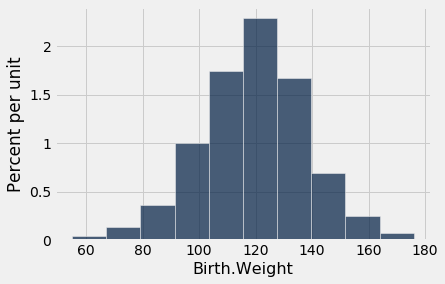

In [53]:
# Creating a histogram
ds_baby.hist('Birth.Weight')

In `pandas`, we use `hist()` to create histograms, just like `datascience`. Refer to the [documentation](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.hist.html) for a full list of parameters.

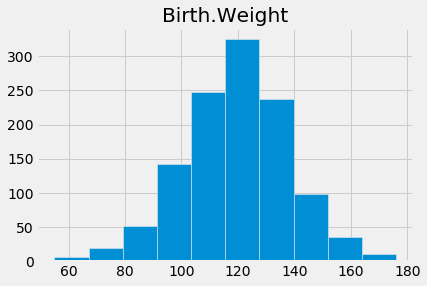

In [54]:
# Creating a histogram
pd_baby.hist('Birth.Weight');

### 2.2 Line Plots

In `datascience`, we used `plot()` to create a line plot of numerical values. In this example, we will be using census data and plot variables such as Age in a line plot

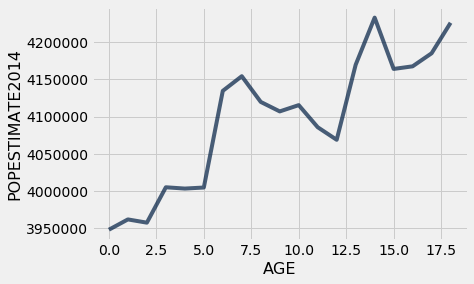

In [55]:
# Line plot in datascience
ds_census = Table.read_table("https://raw.githubusercontent.com/YData123/sds123-sp21/main/demos/lec07/nc-est2014-agesex-res.csv").select(['SEX', 'AGE', 'POPESTIMATE2014'])
ds_children = ds_census.where('SEX', are.equal_to(0)).where('AGE', are.below(19)).drop('SEX')
ds_children.plot('AGE')

In `pandas`, we can use `plot.line()` to create line plots. For a full list of parameters, refer to the [documentation](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.line.html).

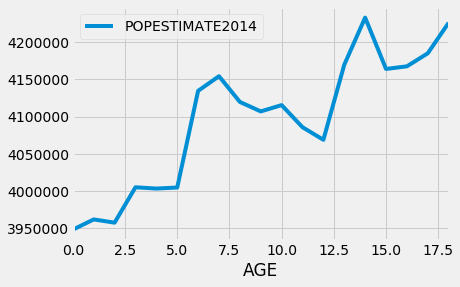

In [56]:
# Line plot in pandas
pd_census = pd.read_csv("https://raw.githubusercontent.com/YData123/sds123-sp21/main/demos/lec07/nc-est2014-agesex-res.csv")[["SEX", "AGE", "POPESTIMATE2014"]]
pd_children = pd_census[(pd_census.SEX == 0) & (pd_census.AGE < 19)].drop("SEX", axis = 1)
pd_children.plot.line(x = "AGE", y = "POPESTIMATE2014");

### 3.3 Scatter Plots

In `datascience`, we used `scatter()` to create a scatter plot of two numerical columns

In [57]:
ds_football = Table.read_table('https://raw.githubusercontent.com/YData123/sds123-sp21/main/demos/lec19/deflategate.csv')
ds_football

Team,Blakeman,Prioleau
Patriots,11.5,11.8
Patriots,10.85,11.2
Patriots,11.15,11.5
Patriots,10.7,11
Patriots,11.1,11.45
Patriots,11.6,11.95
Patriots,11.85,12.3
Patriots,11.1,11.55
Patriots,10.95,11.35
Patriots,10.5,10.9


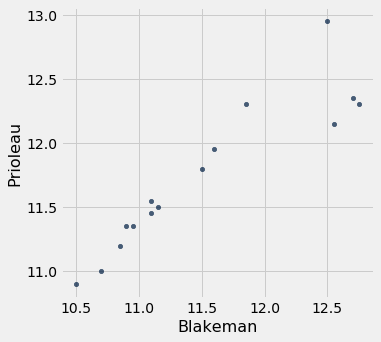

In [58]:
ds_football.scatter('Blakeman', 'Prioleau')

In `pandas`, we use `plot.scatter()` to create a scatter plot. For a full list of parameters, refer to the [documentation](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.scatter.html).

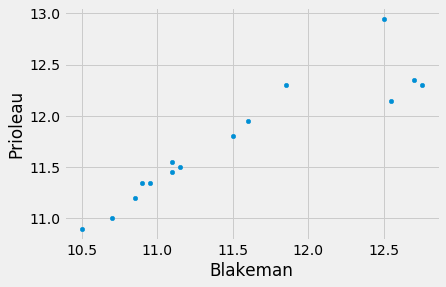

In [59]:
pd_football = pd.read_csv('https://raw.githubusercontent.com/YData123/sds123-sp21/main/demos/lec19/deflategate.csv')
pd_football.plot.scatter(x = "Blakeman", y = "Prioleau");

### 3.4 Bar Plots

In `datascience`, we used `barh()` to create a horizontal bar plot

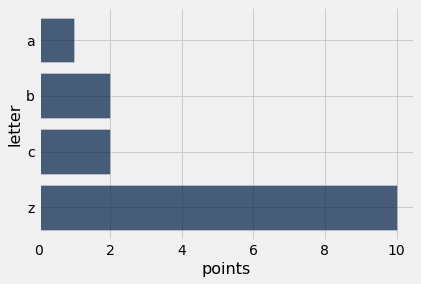

In [60]:
ds_tb.barh("letter", "points")

In `pandas', we use `plot.barh()` to create a bar chart. For a full list of parameters, refer to the [documentation](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.barh.html).

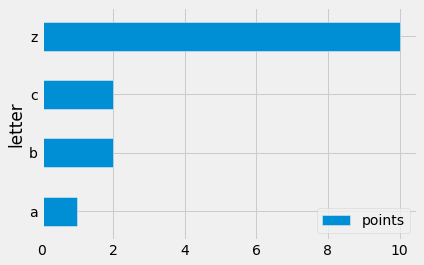

In [61]:
pd_df.plot.barh(x = 'letter', y = 'points');

---

## Further Reading

Here is a list of useful Pandas resources:

- [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [Dataquest Pandas Tutorial](https://www.dataquest.io/blog/pandas-python-tutorial/)
- [Pandas Cookbook](http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/tree/master/cookbook/)